W = [[0.30299099]], b: [[0.31371037]], loss : 3586.305603980669
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.1466322165574
W = [[3.90136899]], b: [[3.9022145]], loss : 143.14663

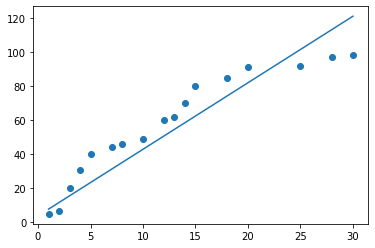

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 18, 20, 25, 28, 30]).reshape(-1,1)
t_data = np.array([5, 7, 20, 31, 40, 44, 46, 49, 60, 62, 70, 80, 85, 91, 92, 97, 98]).reshape(-1,1)


W = np.random.rand(1,1)
b = np.random.rand(1)

def loss_func(x, t):
    
    y = np.dot(x, W) + b
    
    return np.mean(np.power((t-y),2))

def numerical_dericative(f,x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)
    

    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index
        
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x
        
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
        
    return derivative_x

def predict(x):

    return np.dot(x,W) + b

learning_rate = 0.0001

f = lambda x : loss_func(x_data, t_data)

for step in range(80000):
    
    W = W - learning_rate * numerical_dericative(f,W)
    b = W - learning_rate * numerical_dericative(f,b)
    
    if step % 5000 == 0:
        print('W = {}, b: {}, loss : {}'.format(W,b,loss_func(x_data,t_data)))
        
print(predict(20))
plt.rcParams['figure.facecolor'] = 'white'
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data, W) + b)
plt.show()

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]
W : [[0.37027802]], b : [0.70348113], loss : 1089.176098226174
W : [[0.56215498]], b : [0.49164794], loss : 868.0102368085007
W : [[0.56485852]], b : [0.27802517], loss : 867.0974148195916
W : [[0.56755815]], b : [0.06471181], loss : 866.1872352080994
W : [[0.57025386]], b : [-0.14829258], loss : 865.2796903250435
W : [[0.57294567]], b : [-0.36098845], loss : 864.3747725435892


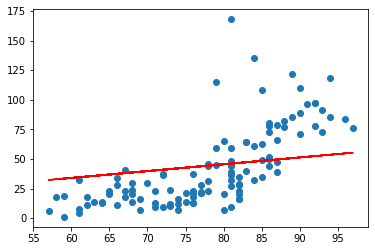

[[35.11591462]]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import my_library.machine_learning_library

df = pd.read_csv("/Users/mac/notebook_dir/data/ozone.csv")
print(df)

training_data = df[[
    'Temp','Ozone'
]]

# print(training_data.shape)

training_data = training_data.dropna(how = 'any')

# print(training_data.shape)

x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

W = np.random.rand(1,1)
b = np.random.rand(1)

def loss_func(x,t):
    
    y = np.dot(x,W) + b
    
    return np.mean(np.power((t-y),2))

def predict(x):
    
    return np.dot(x, W) + b

learning_rate = 1e-5

f = lambda x : loss_func(x_data, t_data)

for step in range(30000):
    
    W = W - learning_rate * numerical_dericative(f,W)
    b = b - learning_rate * numerical_dericative(f,b)
    
    if step % 5000 ==  0 :
        print(f"W : {W}, b : {b}, loss : {loss_func(x_data,t_data)}")
        
plt.scatter(x_data, t_data)
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(x_data,np.dot(x_data,W) + b, color = 'r')

plt.show()

result = predict(62)
print(result)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('/Users/mac/notebook_dir/data/ozone.csv')

training_data = df[[
    'Temp', 'Ozone'
]]

print(training_data) = training_data.dropna(how = 'any')

     Temp  Ozone
0      67   41.0
1      72   36.0
2      74   12.0
3      62   18.0
4      56    NaN
..    ...    ...
148    70   30.0
149    77    NaN
150    75   14.0
151    76   18.0
152    68   20.0

[153 rows x 2 columns]
